In [ ]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import LSTM, Dropout, SimpleRNN, GRU, Dense, RepeatVector, TimeDistributed
from keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA

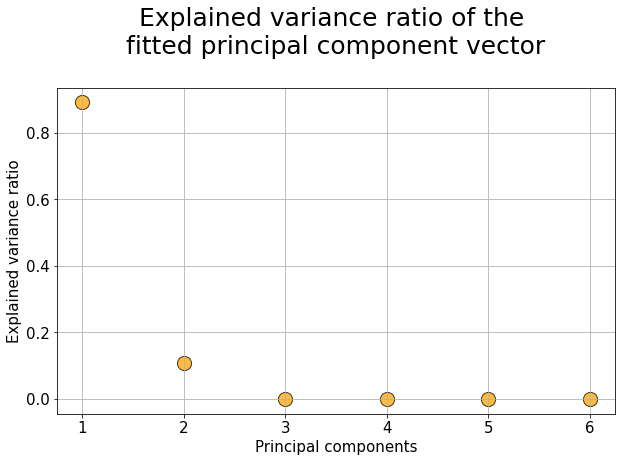

In [ ]:
stock_data=pd.read_csv('data/stock_data.csv')
energy_data=pd.read_csv('data/energy_data.csv')
df=stock_data
scaler=StandardScaler()
df=scaler.fit_transform(df)
df=pd.DataFrame(df,columns=stock_data.columns)
df # scaled data
pca=PCA(n_components=None)
pca_stock=pca.fit(df)
pca_stock
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca_stock.explained_variance_ratio_))],y=pca_stock.explained_variance_ratio_, s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca_stock.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()


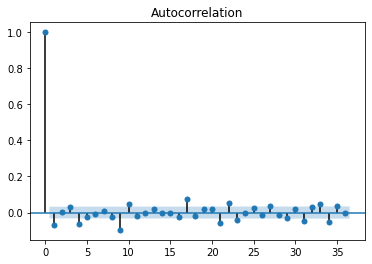

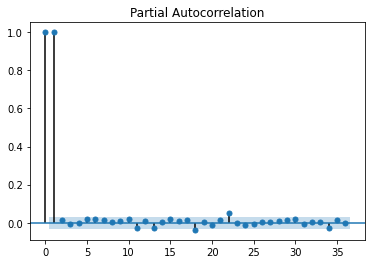

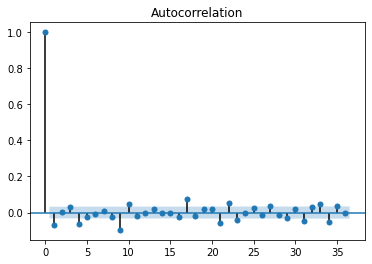

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
dfx_trans=pca.transform(df)
dfx_trans = pd.DataFrame(data=df)
dfx_trans
plot_pacf(dfx_trans[dfx_trans.columns[0]])
plot_acf(dfx_trans[dfx_trans.columns[0]].diff().dropna())

In [ ]:
## Data loading
data_name = 'energy'

seq_len = 17# obtain sequence length from PCA

if data_name in ['stock', 'energy']:
  ori_data = real_data_loading(data_name, seq_len)

elif data_name == 'sine':
  # Set number of samples and its dimensions
  no, dim = 10000, 5
  ori_data = sine_data_generation(no, seq_len, dim)
print(data_name + ' dataset is ready.')

energy dataset is ready.


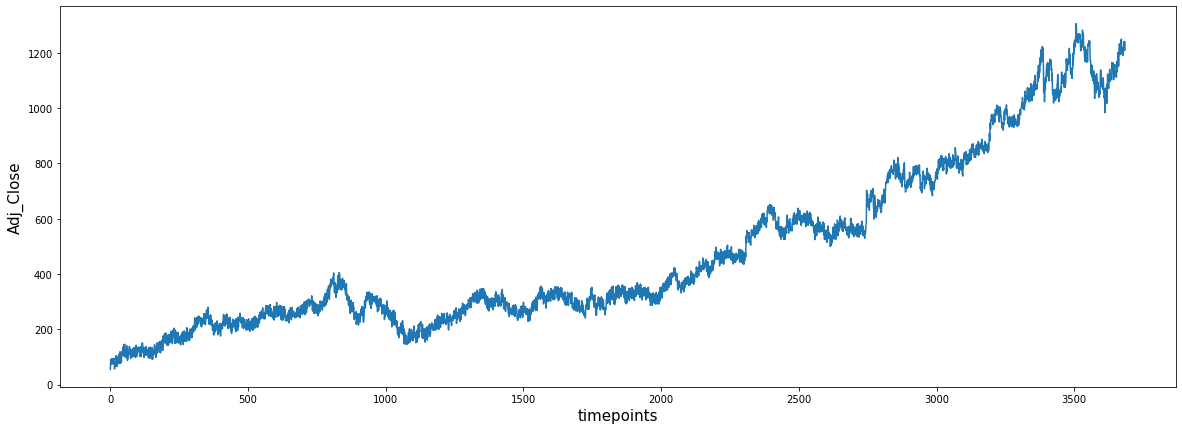

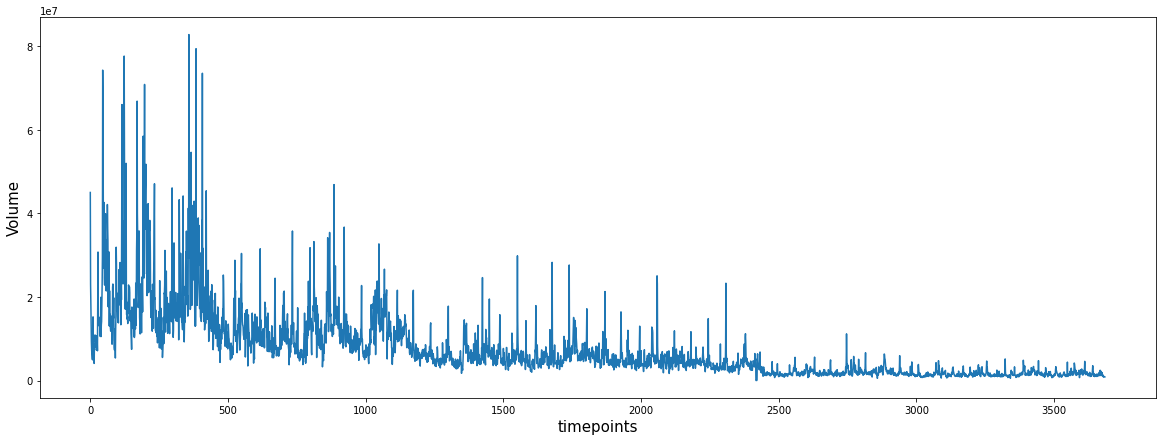

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(stock_data["Adj_Close"]+50*np.random.random(len(stock_data)))
plt.xlabel('timepoints',fontsize=15)
plt.ylabel('Adj_Close',fontsize=15)
plt.title=("Stock Prices")
# fig.savefig("benchmark.png")

plt.figure(figsize=(20,7))
plt.plot(stock_data["Volume"])
plt.xlabel('timepoints',fontsize=15)
plt.ylabel('Volume',fontsize=15)
plt.title=("Stock Prices")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df=stock_data
X = scaler.fit_transform(df)
dfx = pd.DataFrame(data=X,columns=df.columns[1:])
dfx.head(10)
dfx.describe()


NameError: ignored

In [ ]:
 #create a data frame with just the constituents
scaler=MinMaxScaler()
scaled_X_AE=scaler.fit_transform(df) #scale it in a min-max sense
Data=scaled_X_AE
Data=np.reshape(Data,(1,Data.shape[0],Data.shape[1])) #(1 training example with 2441 timesteps and 46 features)

model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(Data.shape[1],Data.shape[2]),return_sequences=True,name='Enc_1'))
#model.add(SimpleRNN(20, activation='relu', return_sequences=True,name='Enc_1_1'))
model.add(SimpleRNN(Data.shape[2], activation='relu', return_sequences=True,name='Dec_1'))
#model.add(TimeDistributed(Dense(Data.shape[2],kernel_regularizer='l2'),name='dec_1'))
model.compile(optimizer='rmsprop', loss='mse')

# ',patience=10,min_delta=0.01,'
hist=model.fit(Data,Data,epochs=1000,batch_size=1,callbacks=[EarlyStopping(monitor='loss',patience=20,restore_best_weights=True)])

model=Model(inputs=model.inputs, outputs=model.layers[1].output)
decoded_data=model.predict(Data)
decoded_data.shape

In [ ]:
#decoded_data=np.reshape(decoded_data,(decoded_data.shape[1],decoded_data.shape[2]))
decoded_data=scaler.inverse_transform(decoded_data)
denoised=pd.DataFrame(decoded_data,columns=stock_data.columns)
denoised

Open          High  ...     Adj_Close        Volume
0     6.024921e+04  1.224052e+05  ...  1.471217e+05  1.602964e+15
1     6.024921e+04  6.188015e+04  ...  1.125087e+05  1.843370e+15
2     6.024921e+04  6.188015e+04  ...  1.179226e+05  1.456128e+15
3     6.024921e+04  6.188015e+04  ...  7.428870e+04  1.286509e+15
4     6.024921e+04  6.188015e+04  ...  6.341856e+04  1.087435e+15
...            ...           ...  ...           ...           ...
3680  1.452946e+06  1.473695e+06  ...  1.440626e+06  6.538056e+11
3681  1.451633e+06  1.476236e+06  ...  1.443220e+06  6.538056e+11
3682  1.458113e+06  1.486691e+06  ...  1.453782e+06  6.538056e+11
3683  1.457266e+06  1.481327e+06  ...  1.443154e+06  6.538056e+11
3684  1.459263e+06  1.476294e+06  ...  1.444020e+06  6.538056e+11

[3685 rows x 6 columns]

In [ ]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 10000
parameters['batch_size'] = 128

In [ ]:
# Run TimeGAN
generated_data = timegan(ori_data, parameters)   
print('Finish Synthetic Data Generation')





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons


In [ ]:
# be careful
# generated_data=temp
temp=generated_data

In [ ]:
generated_data=generated_data - np.random.random_sample((generated_data.shape))

In [ ]:
metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

Instructions for updating:
Please use tf.global_variables instead.


In [ ]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))


Predictive score: 0.4587


TypeError: ignored

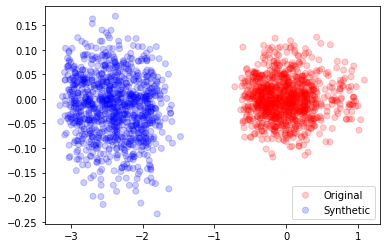

In [ ]:
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')